# Applying Naive Bayes

## <h> Naive Bayes </h1>

We will be using Naive Bayes for the text classification task at hand. Naive Bayes is simple yet a powerfull algorithm for text classification tasks. It uses probability of the events for its purpose. It is based on the Bayes Theorem which assumes that there is no interdependence amongst the variables. 
You can read more about it from [here](https://analyticsindiamag.com/naive-bayes-why-is-it-favoured-for-text-related-tasks/) 

We will create two sets and train the naive bayes model on both of them
   
* Set 1: categorical, numerical features + preprocessed_eassay (BOW)
* Set 2: categorical, numerical features + preprocessed_eassay (TFIDF)

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# library for splitting the dataset
from sklearn.model_selection import train_test_split

# libraries for featurization  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer

# library for modeling 
from sklearn.naive_bayes import MultinomialNB

#  library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# libraries for evaluation of model 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

## 1.1 Loading Data

In [3]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
# seperating the class column from the dataset
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

# splitting the data and class labels in to train set and test set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [5]:
print('train data shape',X_train.shape)
print('train data labels shape ',y_train.shape)
print('test data shape',X_test.shape)
print('test data labels shape',y_test.shape)

train data shape (73196, 8)
train data labels shape  (73196,)
test data shape (36052, 8)
test data labels shape (36052,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

#### BOW for essay

In [6]:
# calling the CountVectorizer class with three parameters 
vectorizer_bow = CountVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer_bow.fit(X_train['essay'].values) # fitting the model with train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_bow.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer_bow.transform(X_test['essay'].values)

# getting the features of bow vectorization 
features_bow = vectorizer_bow.get_feature_names() # we will be using this afterwords 

print("After vectorizations using BOW")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)

After vectorizations using BOW
(73196, 5000) (73196,)
(36052, 5000) (36052,)


#### tf-idf for essay

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer_tfidf.fit(X_train['essay'].values)

X_train_essay_tf_idf = vectorizer_tfidf.transform(X_train['essay'].values)
X_test_essay_tf_idf = vectorizer_tfidf.transform(X_test['essay'].values)


# getting the features of tfidf vectorization 
features_tfidf = vectorizer_tfidf.get_feature_names() # we will be using this afterwords 

print("After vectorizations using tf-idf")
print(X_train_essay_tf_idf.shape, y_train.shape)
print(X_test_essay_tf_idf.shape, y_test.shape)

After vectorizations using tf-idf
(73196, 5000) (73196,)
(36052, 5000) (36052,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

### Encoding Categorical features 

In [ ]:
# categorical features "school_state"

vectorizer_school_state = CountVectorizer()
vectorizer_school_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_school_state_ohe = vectorizer_school_state.transform(X_train['school_state'].values)
X_test_school_state_ohe = vectorizer_school_state.transform(X_test['school_state'].values)

# getting the features of 'school_state' vectorization
features_school_state = vectorizer_school_state.get_feature_names() # we will be using this afterwords 

vectorizer_school_state.get_feature_names()
print("After vectorizations of school_state")
print(X_train_school_state_ohe.shape, y_train.shape)
print(X_test_school_state_ohe.shape, y_test.shape)
print(vectorizer_school_state.get_feature_names())
print("="*100)


After vectorizations of school_state
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [ ]:
# categorical features "clean_categories"

vectorizer_clean_categories = CountVectorizer()
vectorizer_clean_categories.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the 'clean_categories' to vector representation
X_train_clean_categories_ohe = vectorizer_clean_categories.transform(X_train['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer_clean_categories.transform(X_test['clean_categories'].values)


# getting the features of 'clean_categories' vectorization
features_clean_categories = vectorizer_clean_categories.get_feature_names() # we will be using this afterwords

print("After vectorizations of clean_categories")
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(features_clean_categories)
print("="*100)

After vectorizations of clean_categories
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [ ]:
# categorical features "clean_subcategories"

vectorizer_clean_subcategories = CountVectorizer()
vectorizer_clean_subcategories.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the 'clean_subcategories' to vector
X_train_clean_subcategories_ohe = vectorizer_clean_subcategories.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer_clean_subcategories.transform(X_test['clean_subcategories'].values)

# getting the features of 'clean_subcategories' vectorization
features_clean_subcategories = vectorizer_clean_subcategories.get_feature_names() # we will be using this afterwords

print("After vectorizations of clean_subcategories")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(features_clean_subcategories)
print("="*100)

After vectorizations of clean_subcategories
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [ ]:
# categorical features "teacher_prefix"

vectorizer_teacher_prefix = CountVectorizer()
vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the "teacher_prefix" to vector
X_train_teacher_ohe = vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values)

# getting the features of 'teacher_prefix' vectorization
features_teacher_prefix = vectorizer_teacher_prefix.get_feature_names() # we will be using this afterwords

print("After vectorizations of teacher_prefix")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(features_teacher_prefix)
print("="*100)

After vectorizations of teacher_prefix
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [ ]:
# categorical features "project_grade_category"

vectorizer_project_grade_category = CountVectorizer()
vectorizer_project_grade_category.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the "project_grade_category" to vector
X_train_grade_ohe = vectorizer_project_grade_category.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer_project_grade_category.transform(X_test['project_grade_category'].values)

# getting the features of 'project_grade_category' vectorization
features_project_grade_category = vectorizer_project_grade_category.get_feature_names() # we will be using this afterwords

print("After vectorizations of project_grade_category")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(features_project_grade_category)
print("="*100)

After vectorizations of project_grade_category
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### Encoding numerical features 

In [ ]:
# "price" feature
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1)).reshape(-1,1)
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1)).reshape(-1,1)


print("After normalization of price feature")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After normalization of price feature
(73196, 1) (73196,)
(36052, 1) (36052,)


In [ ]:
# 'teacher_number_of_previously_posted_projects' feature
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_previous_pro_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_test_previous_pro_norm= normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)

print("After normalization of 'teacher_number_of_previously_posted_projects' feature")
print(X_train_previous_pro_norm.shape, y_train.shape)
print(X_test_previous_pro_norm.shape, y_test.shape)
print("="*100)

After normalization of 'teacher_number_of_previously_posted_projects' feature
(73196, 1) (73196,)
(36052, 1) (36052,)


## Set-1 essay with BOW representation


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_bow = hstack((X_train_essay_bow, X_train_school_state_ohe, X_train_clean_categories_ohe,  # train data after BOW representation for text feature('essay')
                   X_train_clean_subcategories_ohe, X_train_teacher_ohe, X_train_grade_ohe,
                   X_train_price_norm, X_train_previous_pro_norm)).tocsr()

X_te_bow = hstack((X_test_essay_bow, X_test_school_state_ohe, X_test_clean_categories_ohe,     # test data after BOW representation for text feature('essay')
                   X_test_clean_subcategories_ohe, X_test_teacher_ohe, X_test_grade_ohe,
                   X_test_price_norm, X_test_previous_pro_norm)).tocsr()

print("Final Data matrix with BOW representation for essay")
print(X_tr_bow.shape, y_train.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix with BOW representation for essay
(73196, 5101) (73196,)
(36052, 5101) (36052,)


## Set-2 essay with tf-idf representation

In [ ]:
from scipy.sparse import hstack

X_tr_tfidf = hstack((X_train_essay_tf_idf, X_train_school_state_ohe, X_train_clean_categories_ohe,  # train data after tf-idf representation for text feature('essay')
                   X_train_clean_subcategories_ohe, X_train_teacher_ohe, X_train_grade_ohe,
                   X_train_price_norm, X_train_previous_pro_norm)).tocsr()

X_te_tfidf = hstack((X_test_essay_tf_idf, X_test_school_state_ohe, X_test_clean_categories_ohe,     # test data after tf-idf representation for text feature('essay')
                   X_test_clean_subcategories_ohe, X_test_teacher_ohe, X_test_grade_ohe,
                   X_test_price_norm, X_test_previous_pro_norm)).tocsr()


print("Final Data matrix with tf-idf representation for essay")
print(X_tr_tfidf.shape, y_train.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix with tf-idf representation for essay
(73196, 5101) (73196,)
(36052, 5101) (36052,)



<h2> Applying Naive Bayes on different kind of featurization. </h2>


#### **Naive Bayes on BOW representation for feature 'essay'**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# using grid search for finding the best alpha for laplace smoothing/additive smoothing 
from sklearn.model_selection import GridSearchCV

NB_classifier = MultinomialNB(class_prior=[0.5,0.5]) # model when priors are not adjusted according to the data.
 
parameters = {'alpha': [0.001, 0.05, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10, 20, 25, 30, 50, 70, 100]}  # various values of alhap's to choose from.
clf = GridSearchCV(NB_classifier, parameters, cv=10, scoring='roc_auc', return_train_score=True)  # gridsearchCV with 10 fold cross validation.
clf.fit(X_tr_bow, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])


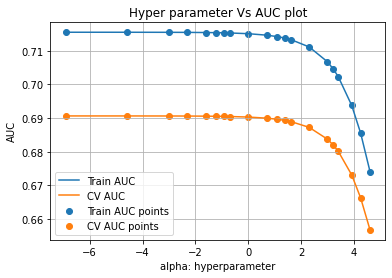

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.118739,0.006533,0.010216,0.000268,0.001,{'alpha': 0.001},0.698709,0.681113,0.680771,0.691553,0.690379,0.691632,0.689585,0.702114,0.686632,0.693879,0.690637,0.006438,1,0.715115,0.715837,0.716878,0.715846,0.715578,0.715150,0.715886,0.714264,0.715470,0.715418,0.715544,0.000638
2,0.116712,0.002730,0.010161,0.000146,0.01,{'alpha': 0.01},0.698703,0.681109,0.680768,0.691552,0.690376,0.691631,0.689582,0.702107,0.686630,0.693875,0.690633,0.006437,2,0.715111,0.715833,0.716874,0.715843,0.715574,0.715146,0.715882,0.714260,0.715467,0.715414,0.715540,0.000638
1,0.115758,0.001150,0.010203,0.000187,0.05,{'alpha': 0.05},0.698689,0.681094,0.680756,0.691536,0.690365,0.691618,0.689566,0.702092,0.686622,0.693859,0.690620,0.006436,3,0.715094,0.715816,0.716856,0.715826,0.715556,0.715129,0.715865,0.714243,0.715450,0.715397,0.715523,0.000638
3,0.116076,0.001110,0.010110,0.000157,0.1,{'alpha': 0.1},0.698669,0.681081,0.680745,0.691520,0.690349,0.691608,0.689544,0.702074,0.686615,0.693843,0.690605,0.006434,4,0.715072,0.715795,0.716833,0.715804,0.715535,0.715108,0.715843,0.714222,0.715429,0.715375,0.715501,0.000638
4,0.115916,0.001551,0.010462,0.001017,0.2,{'alpha': 0.2},0.698627,0.681044,0.680726,0.691479,0.690312,0.691568,0.689504,0.702038,0.686584,0.693801,0.690568,0.006430,5,0.715029,0.715753,0.716788,0.715762,0.715491,0.715064,0.715800,0.714178,0.715386,0.715330,0.715458,0.000638


In [ ]:
cv_auc = results['mean_test_score']      # mean test scores for every 'alpha'
train_auc = results['mean_train_score']  # mean train scores for every 'alpha
alpha =  list(results['param_alpha']) 
alpha=np.log(alpha)   # taking log of alphas so to make the plot more readable
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [ ]:
clf.best_params_  # best parameter

{'alpha': 0.001}

In [ ]:
clf.best_estimator_ # best estimator using this estimator lets predict the labels of test data

MultinomialNB(alpha=0.001, class_prior=[0.5, 0.5], fit_prior=True)

In [ ]:
# function to get the batchwise probabilities give classifier and data 

def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

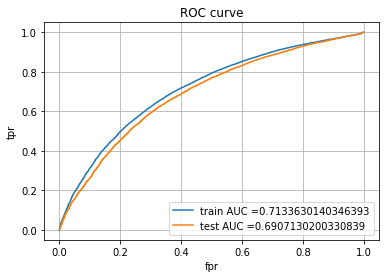

In [ ]:
from sklearn.metrics import roc_curve, auc

NBclassifier_bow = MultinomialNB(alpha=0.001, class_prior=[0.5, 0.5], fit_prior=True)

NBclassifier_bow.fit(X_tr_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(NBclassifier_bow, X_tr_bow)    # predicted probabilities for train data
y_test_pred = batch_predict(NBclassifier_bow, X_te_bow)     # predicted probabilities for test data

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)   # fpr and tpr for train data
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)       # fpr and tpr for test data

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve")
plt.grid()
plt.show()

#### confusion matrix 

In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
from sklearn.metrics import confusion_matrix

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)  # getting the best threshold for seperating the predicted class labels

test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))  # calculates the confusion matrix


the maximum value of tpr*(1-fpr) 0.4392671383672738 for threshold 0.52


Test confusion matrix


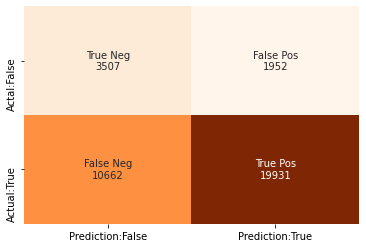

In [ ]:
# below code is taken from  https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                test_confusion_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

print("Test confusion matrix")
sns.heatmap(test_confusion_matrix, annot=labels, fmt='', cmap='Oranges',cbar=False, xticklabels=['Prediction:False', 'Prediction:True'], yticklabels=['Actal:False', 'Actual:True'])

#### **Naive Bayes on tf-idf representation for feature 'essay'**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

NB_classifier = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha': [0.001, 0.05, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10, 20, 25, 30, 50, 70, 100]}
clf = GridSearchCV(NB_classifier, parameters, cv=10, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_tfidf, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])


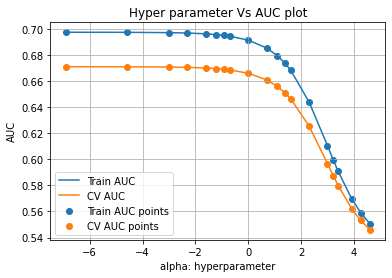

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.116652,0.002939,0.010541,0.000694,0.001,{'alpha': 0.001},0.683851,0.661570,0.664878,0.677991,0.668676,0.672785,0.661055,0.687219,0.661107,0.672045,0.671118,0.008999,1,0.697643,0.698587,0.698793,0.697957,0.697453,0.696862,0.698368,0.695868,0.697838,0.696289,0.697566,0.000919
2,0.114465,0.001361,0.010049,0.000136,0.01,{'alpha': 0.01},0.683793,0.661517,0.664845,0.677942,0.668627,0.672747,0.661001,0.687169,0.661064,0.672003,0.671071,0.008997,2,0.697588,0.698534,0.698737,0.697903,0.697399,0.696807,0.698314,0.695814,0.697783,0.696232,0.697511,0.000919
1,0.116240,0.003049,0.010030,0.000093,0.05,{'alpha': 0.05},0.683554,0.661324,0.664707,0.677763,0.668383,0.672589,0.660803,0.686938,0.660850,0.671795,0.670871,0.008986,3,0.697342,0.698296,0.698488,0.697665,0.697160,0.696562,0.698070,0.695567,0.697540,0.695979,0.697267,0.000921
3,0.114386,0.000585,0.010076,0.000195,0.1,{'alpha': 0.1},0.683291,0.661089,0.664547,0.677516,0.668054,0.672377,0.660586,0.686655,0.660622,0.671531,0.670627,0.008967,4,0.697037,0.697999,0.698177,0.697365,0.696861,0.696256,0.697765,0.695260,0.697237,0.695669,0.696963,0.000923
4,0.115610,0.002328,0.010122,0.000236,0.2,{'alpha': 0.2},0.682748,0.660591,0.664237,0.677037,0.667463,0.671967,0.660075,0.686037,0.660090,0.671042,0.670129,0.008938,5,0.696425,0.697410,0.697551,0.696768,0.696265,0.695645,0.697159,0.694649,0.696627,0.695050,0.696355,0.000926


In [ ]:
cv_auc = results['mean_test_score']
train_auc = results['mean_train_score'] 
K =  list(results['param_alpha'])
K = np.log(K)
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [ ]:
clf.best_params_  #best parameter

{'alpha': 0.001}

In [ ]:
clf.best_estimator_ # using this estimator we will predict test labels

MultinomialNB(alpha=0.001, class_prior=[0.5, 0.5], fit_prior=True)

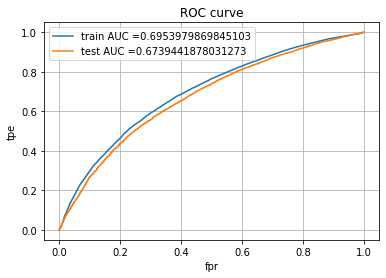

In [ ]:
NBclassifier_tfidf = MultinomialNB(alpha=0.001, class_prior=[0.5, 0.5], fit_prior=True)  # best estimator

NBclassifier_tfidf.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(NBclassifier_tfidf, X_tr_tfidf)    
y_test_pred = batch_predict(NBclassifier_tfidf, X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpe")
plt.title("ROC curve")
plt.grid()
plt.show()

#### Confusion matrix

In [ ]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)  # getting the best threshold for separating the predicted class labels

test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))  # calculates the confusion matrix

the maximum value of tpr*(1-fpr) 0.41689787883710283 for threshold 0.501


Test confusion matrix


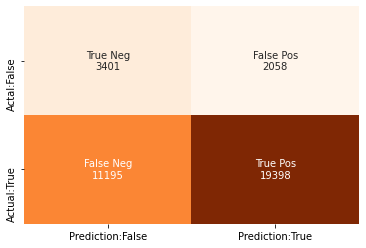

In [ ]:
# below code is taken from  https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                test_confusion_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

print("Test confusion matrix")
sns.heatmap(test_confusion_matrix, annot=labels, fmt='', cmap='Oranges',cbar=False, xticklabels=['Prediction:False', 'Prediction:True'], yticklabels=['Actal:False', 'Actual:True'])

 #### Top 20 features from Set 1 

In [ ]:
# list of all features from train dataset where 'essay' feature is converted in to BOW representation
list_of_features = features_bow + features_school_state + features_clean_categories + features_clean_subcategories + features_teacher_prefix + features_project_grade_category + ['price' ,'teacher_number_of_previously_posted_projects']

In [ ]:
# Top 20 features form negative class
features = np.argsort(NBclassifier_bow.feature_log_prob_[0]) # sorting the features log probability for negtive class
                                                             #  form low probability to high probability and getting its indice 

features = features[::-1]  # reversing it for high probability to low probability indice

for i in features[:20]:  # printing top 20 features from negative calss
    print(list_of_features[i])

students
school
learning
my
classroom
not
learn
they
help
the
my students
nannan
many
we
need
work
come
love
reading
able


In [ ]:
# Top 20 features form positive class
features = np.argsort(NBclassifier_bow.feature_log_prob_[1]) # sorting the features log probability for positive class 
                                                             # form low probability to high probability and getting its indice 

features = features[::-1] # reversing it form high proba to low proba

for i in features[:20]:  # printing top 20 features form positive class
    print(list_of_features[i])

students
school
my
learning
classroom
the
they
not
my students
learn
help
many
nannan
we
reading
need
work
use
love
day


<h1>Summary</h1>


In [ ]:
from prettytable import PrettyTable
x = PrettyTable()

In [ ]:
x.field_names = ["Vectorizer", "Model", "Hyper parameter : alpha", "AUC"]
x.add_row(["BOW", 'Multinomial Naive Bayes', 0.001, 0.69])
x.add_row(["tf-idf", 'Multinomial Naive Bayes', 0.001, 0.67])

In [ ]:
print(x.get_string())

+------------+-------------------------+-------------------------+------+
| Vectorizer |          Model          | Hyper parameter : alpha | AUC  |
+------------+-------------------------+-------------------------+------+
|    BOW     | Multinomial Naive Bayes |          0.001          | 0.69 |
|   tf-idf   | Multinomial Naive Bayes |          0.001          | 0.67 |
+------------+-------------------------+-------------------------+------+
